# Udemy courses dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset and first evaluation of df

In [2]:
df = pd.read_csv('Udemy-Dataset.csv')

In [3]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [4]:
# genegral information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [5]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [6]:
# check some statistical analysis of the dataset using describe method
df.describe()

,course_id,num_subscribers,num_reviews,num_lectures
count,3.682000e+03,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,3194.230310,156.093156,40.065182
std,3.436355e+05,9499.378361,934.957204,50.373299
min,8.324000e+03,0.000000,0.000000,0.000000
25%,4.078430e+05,110.250000,4.000000,15.000000
50%,6.885580e+05,911.500000,18.000000,25.000000
75%,9.617515e+05,2540.250000,67.000000,45.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000


In [7]:
# check str columns
df.select_dtypes(include='object')

,course_title,price,level,content_duration,published_timestamp,subject
0,#1 Piano Hand Coordination: Play 10th Ballad i...,35,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,#10 Hand Coordination - Transfer Chord Ballad ...,75,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,#12 Hand Coordination: Let your Hands dance wi...,75,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,#4 Piano Hand Coordination: Fun Piano Runs in ...,75,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,#5 Piano Hand Coordination: Piano Runs in 2 ...,75,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...
3677,Your Own Site in 45 Min: The Complete Wordpres...,120,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,Your Second Course on Piano: Two Handed Playing,70,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,Zend Framework 2: Learn the PHP framework ZF2 ...,40,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
3680,Zoho Books Gestion Financière d'Entreprise pas...,Free,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance


In [8]:
# check missing values
df.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [9]:
# number of unique values 
df.nunique()

course_id              3676
course_title           3667
is_paid                   2
price                    38
num_subscribers        2198
num_reviews             511
num_lectures            229
level                     4
content_duration        109
published_timestamp    3676
subject                   4
dtype: int64

# Data Cleaning  
__Correcting feature's dtypes and values__

### Check duplicates values

In [10]:
# check duplicats
df.duplicated().sum()

6

In [11]:
# drop duplicate rows
df.drop_duplicates(inplace = True)

### Correct dtype of `published_timestamp`

In [12]:
# changing published_timestamp dtype to datetime
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

#### ___Seperating Date from 'published_timestamp' column___

In [13]:
df['Date'] = df['published_timestamp'].dt.date

In [14]:
# changint Date & Time dtype to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.year

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3676 entries, 0 to 3681
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3676 non-null   int64              
 1   course_title         3676 non-null   object             
 2   is_paid              3676 non-null   bool               
 3   price                3676 non-null   object             
 4   num_subscribers      3676 non-null   int64              
 5   num_reviews          3676 non-null   int64              
 6   num_lectures         3676 non-null   int64              
 7   level                3676 non-null   object             
 8   content_duration     3676 non-null   object             
 9   published_timestamp  3676 non-null   datetime64[ns, UTC]
 10  subject              3676 non-null   object             
 11  Date                 3676 non-null   int32              
dtypes: bool(1), datetime64[ns

### Correcting `price` column

In [16]:
# Convert numeric values to int and mark 'Free' courses
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Convert to numeric, coerce errors to NaN

In [17]:
# filling NaN values of price column to 0 indicating that course is free of charge
df['price'] = df['price'].fillna(0)

In [18]:
# check if correction has been reflected on df
df[df['is_paid'] == False]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Date
41,286070,5 lecciones que todo guitarrista debe tomar,False,0.0,4452,263,14,Beginner Level,1 hour,2014-08-23 05:08:14+00:00,Musical Instruments,2014
49,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,0.0,4529,193,7,Beginner Level,36 mins,2015-12-21 18:50:50+00:00,Musical Instruments,2015
57,955914,A beginner`s guide to fingerpicking and strumm...,False,0.0,3481,29,20,Beginner Level,2 hours,2016-09-13 21:51:59+00:00,Musical Instruments,2016
67,270976,A how to guide in HTML,False,0.0,7318,205,8,Beginner Level,35 mins,2014-08-10 20:19:10+00:00,Web Development,2014
74,1214144,¡Triunfar en La Bolsa de Valores No Requiere d...,False,0.0,338,7,6,Beginner Level,1 hour,2017-05-30 14:30:12+00:00,Business Finance,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
3620,552598,WordPress in under an hour - Create/manage you...,False,0.0,6474,86,15,All Levels,1 hour,2015-07-15 00:21:56+00:00,Web Development,2015
3638,1068590,Wordpress Website Mastery 2017,False,0.0,5181,64,22,Beginner Level,2.5 hours,2017-01-18 17:01:40+00:00,Web Development,2017
3652,752706,Write quicker HTML5 and CSS 3; productivity ha...,False,0.0,13016,286,15,All Levels,1.5 hours,2016-03-03 17:45:31+00:00,Web Development,2016
3674,1257976,Your First 10 Guitar Lessons - Learn how to pl...,False,0.0,924,4,18,Beginner Level,1 hour,2017-06-29 00:29:36+00:00,Musical Instruments,2017


### Correcting `content_duration` values and dtypes to minutes

In [19]:
def extract_numeric_value(value):
    try:
        if 'hour' in value or 'hours' in value:
            return pd.to_numeric(value.split()[0]) * 60
        elif 'min' in value or 'mins' in value:
            return pd.to_numeric(value.split()[0])
        else:
            return None  
    except Exception as e:
        print(f"Error: {e}")
        return None  

In [20]:
df['content_duration'] = df['content_duration'].apply(extract_numeric_value)

In [21]:
# check if previous function has been affected correctly
df.iloc[3672]

course_id                                                       552700
course_title           Your Second Course on Piano: Two Handed Playing
is_paid                                                           True
price                                                             70.0
num_subscribers                                                   1018
num_reviews                                                         12
num_lectures                                                        22
level                                                   Beginner Level
content_duration                                                 300.0
published_timestamp                          2015-10-26 20:04:21+00:00
subject                                            Musical Instruments
Date                                                              2015
Name: 3678, dtype: object

In [22]:
# check if previous function has been affected correctly
df.iloc[4]

course_id                                                        1120410
course_title           #5  Piano Hand Coordination:  Piano Runs in 2 ...
is_paid                                                             True
price                                                               75.0
num_subscribers                                                      940
num_reviews                                                            3
num_lectures                                                          32
level                                                 Intermediate Level
content_duration                                                    37.0
published_timestamp                            2017-02-21 23:44:49+00:00
subject                                              Musical Instruments
Date                                                                2017
Name: 4, dtype: object

# Renaming columns and reorder them

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3676 entries, 0 to 3681
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3676 non-null   int64              
 1   course_title         3676 non-null   object             
 2   is_paid              3676 non-null   bool               
 3   price                3676 non-null   float64            
 4   num_subscribers      3676 non-null   int64              
 5   num_reviews          3676 non-null   int64              
 6   num_lectures         3676 non-null   int64              
 7   level                3676 non-null   object             
 8   content_duration     3671 non-null   float64            
 9   published_timestamp  3676 non-null   datetime64[ns, UTC]
 10  subject              3676 non-null   object             
 11  Date                 3676 non-null   int32              
dtypes: bool(1), datetime64[ns

In [24]:
# drop unuseable columns
df.drop(columns= ['published_timestamp'], inplace = True)

In [25]:
df = df.rename(columns= {
    'course_id' : 'id',
    'course_title' : 'title',
    'num_subscribers' : 'subscribes',
    'num_reviews' : 'reviews',
    'num_lectures' : 'lectures',
    'content_duration' : 'duration_minutes',
    'Date' : 'publish_date'
})

In [26]:
# re-oder them
df = df[['id', 'title', 'subject', 'level', 'duration_minutes', 'lectures', 'price', 'is_paid', 'subscribes', 'reviews', 'publish_date']].reset_index(drop = True)

In [27]:
df.head()

,id,title,subject,level,duration_minutes,lectures,price,is_paid,subscribes,reviews,publish_date
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,Musical Instruments,All Levels,90.0,68,35.0,True,3137,18,2014
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,Musical Instruments,Intermediate Level,60.0,41,75.0,True,1593,1,2017
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,Musical Instruments,Intermediate Level,90.0,47,75.0,True,482,1,2017
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,Musical Instruments,Intermediate Level,60.0,43,75.0,True,850,3,2017
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,Musical Instruments,Intermediate Level,37.0,32,75.0,True,940,3,2017


____________________________________

# Analyzing dataframe's features values

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'duration_minutes'}>,
        <AxesSubplot:title={'center':'lectures'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'subscribes'}>,
        <AxesSubplot:title={'center':'reviews'}>],
       [<AxesSubplot:title={'center':'publish_date'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

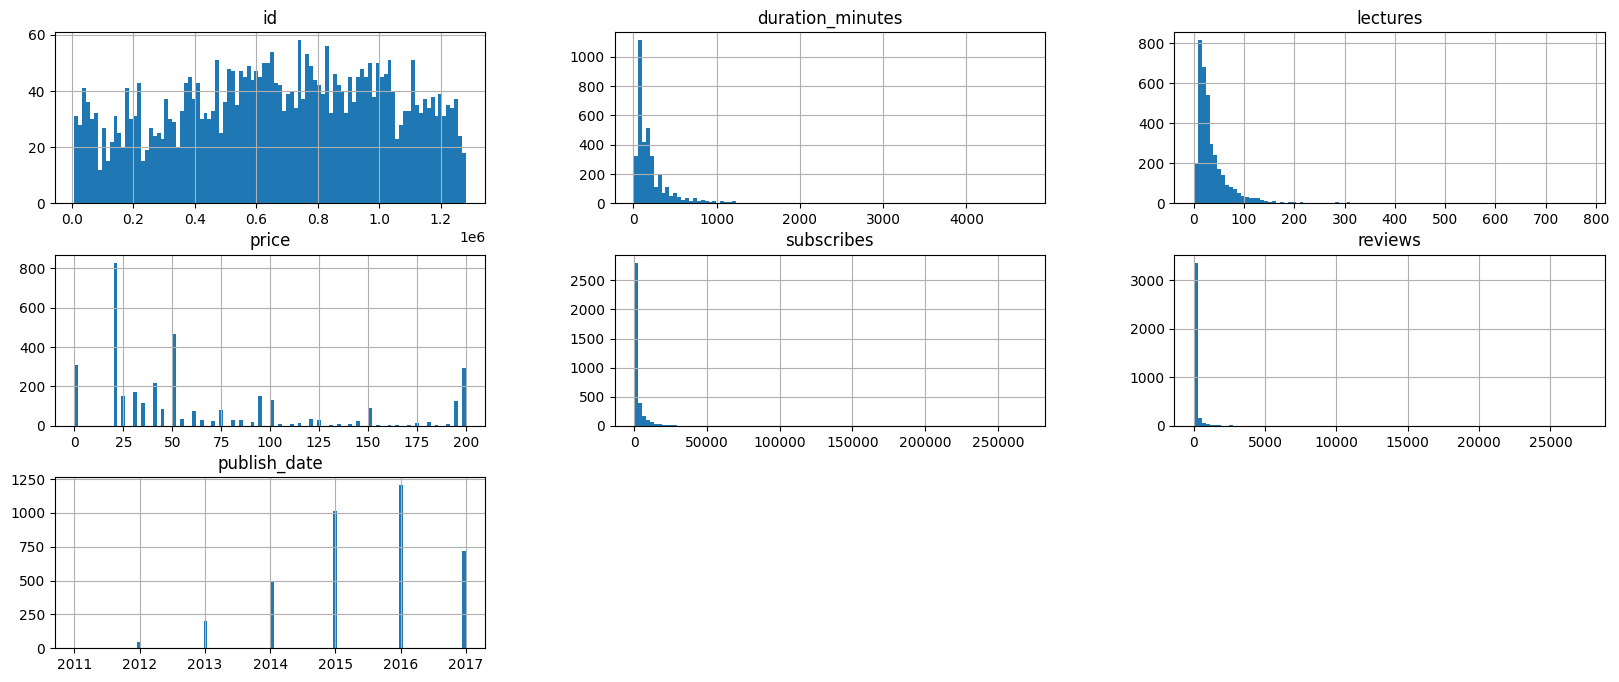

In [28]:
df.hist(figsize = (20, 8), bins = 100)

### All unique values for `subjects` column

In [29]:
df['subject'].unique()

array(['Musical Instruments', 'Business Finance', 'Graphic Design',
       'Web Development'], dtype=object)

### Subjects which have most number of courses on `subject` column

In [30]:
df['subject'].value_counts()

subject
Web Development        1199
Business Finance       1195
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

### All free courses

In [31]:
df[(df['is_paid'] == False)]

,id,title,subject,level,duration_minutes,lectures,price,is_paid,subscribes,reviews,publish_date
41,286070,5 lecciones que todo guitarrista debe tomar,Musical Instruments,Beginner Level,60.0,14,0.0,False,4452,263,2014
49,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",Musical Instruments,Beginner Level,36.0,7,0.0,False,4529,193,2015
57,955914,A beginner`s guide to fingerpicking and strumm...,Musical Instruments,Beginner Level,120.0,20,0.0,False,3481,29,2016
67,270976,A how to guide in HTML,Web Development,Beginner Level,35.0,8,0.0,False,7318,205,2014
74,1214144,¡Triunfar en La Bolsa de Valores No Requiere d...,Business Finance,Beginner Level,60.0,6,0.0,False,338,7,2017
...,...,...,...,...,...,...,...,...,...,...,...
3614,552598,WordPress in under an hour - Create/manage you...,Web Development,All Levels,60.0,15,0.0,False,6474,86,2015
3632,1068590,Wordpress Website Mastery 2017,Web Development,Beginner Level,150.0,22,0.0,False,5181,64,2017
3646,752706,Write quicker HTML5 and CSS 3; productivity ha...,Web Development,All Levels,90.0,15,0.0,False,13016,286,2016
3668,1257976,Your First 10 Guitar Lessons - Learn how to pl...,Musical Instruments,Beginner Level,60.0,18,0.0,False,924,4,2017


In [32]:
# create new datafram of free courses
free = df[(df['is_paid'] == False)].reset_index()
free.head()

,index,id,title,subject,level,duration_minutes,lectures,price,is_paid,subscribes,reviews,publish_date
0,41,286070,5 lecciones que todo guitarrista debe tomar,Musical Instruments,Beginner Level,60.0,14,0.0,False,4452,263,2014
1,49,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",Musical Instruments,Beginner Level,36.0,7,0.0,False,4529,193,2015
2,57,955914,A beginner`s guide to fingerpicking and strumm...,Musical Instruments,Beginner Level,120.0,20,0.0,False,3481,29,2016
3,67,270976,A how to guide in HTML,Web Development,Beginner Level,35.0,8,0.0,False,7318,205,2014
4,74,1214144,¡Triunfar en La Bolsa de Valores No Requiere d...,Business Finance,Beginner Level,60.0,6,0.0,False,338,7,2017


### All paid courses 

In [33]:
df[(df['is_paid'] == True)]

,id,title,subject,level,duration_minutes,lectures,price,is_paid,subscribes,reviews,publish_date
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,Musical Instruments,All Levels,90.0,68,35.0,True,3137,18,2014
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,Musical Instruments,Intermediate Level,60.0,41,75.0,True,1593,1,2017
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,Musical Instruments,Intermediate Level,90.0,47,75.0,True,482,1,2017
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,Musical Instruments,Intermediate Level,60.0,43,75.0,True,850,3,2017
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,Musical Instruments,Intermediate Level,37.0,32,75.0,True,940,3,2017
...,...,...,...,...,...,...,...,...,...,...,...
3670,498488,Your First Successful Forex Trades - With Case...,Business Finance,All Levels,150.0,16,200.0,True,1079,34,2015
3671,328960,Your Own Site in 45 Min: The Complete Wordpres...,Web Development,All Levels,240.0,36,120.0,True,1566,29,2015
3672,552700,Your Second Course on Piano: Two Handed Playing,Musical Instruments,Beginner Level,300.0,22,70.0,True,1018,12,2015
3673,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,Web Development,All Levels,390.0,37,40.0,True,723,130,2015


In [34]:
# create new dataframe of paid courses
paid = df[(df['is_paid'] == True)].reset_index()

### Top selling courses

In [35]:
df.sort_values(by='subscribes', ascending = False)

,id,title,subject,level,duration_minutes,lectures,price,is_paid,subscribes,reviews,publish_date
2227,41295,Learn HTML5 Programming From Scratch,Web Development,All Levels,630.0,45,0.0,False,268923,8629,2013
775,59014,Coding for Entrepreneurs Basic,Web Development,Beginner Level,210.0,27,0.0,False,161029,279,2013
3380,625204,The Web Developer Bootcamp,Web Development,All Levels,2580.0,342,200.0,True,121584,27445,2015
640,173548,Build Your First Website in 1 Week with HTML5 ...,Web Development,Beginner Level,180.0,30,0.0,False,120291,5924,2014
3311,764164,The Complete Web Developer Course 2.0,Web Development,All Levels,1830.0,304,200.0,True,114512,22412,2016
...,...,...,...,...,...,...,...,...,...,...,...
403,1221942,Basic Bookkeeping,Business Finance,Beginner Level,44.0,12,35.0,True,0,0,2017
2592,185526,MicroStation - Células,Graphic Design,Beginner Level,37.0,9,20.0,True,0,0,2014
993,603902,Curso de Didgeridoo nivel principiante,Musical Instruments,Beginner Level,60.0,31,50.0,True,0,0,2016
476,1252410,Beginners Guide to Kindle Ebook Covers Design ...,Graphic Design,All Levels,90.0,16,20.0,True,0,0,2017


### Zero subscribes courses

In [36]:
df[(df['subscribes'] == 0)]

,id,title,subject,level,duration_minutes,lectures,price,is_paid,subscribes,reviews,publish_date
37,1234656,4 Week Rhythm Mastery,Musical Instruments,Beginner Level,150.0,28,20.0,True,0,0,2017
44,1231958,60 Minutes to Fundamental Accounting Skills,Business Finance,Beginner Level,150.0,9,75.0,True,0,0,2017
91,1265814,ABRSM Grade III Piano Class - Handel Sonatina ...,Musical Instruments,Beginner Level,31.0,5,20.0,True,0,0,2017
98,1219820,Accounting - The 6 most important rules you mu...,Business Finance,All Levels,60.0,9,20.0,True,0,0,2017
185,872262,Adobe Photoshop pentru Social Media,Graphic Design,Beginner Level,34.0,12,20.0,True,0,0,2016
...,...,...,...,...,...,...,...,...,...,...,...
3323,715476,The Cuckoo Strategy to get European Funding,Business Finance,All Levels,60.0,6,160.0,True,0,0,2016
3462,1214670,Tune that Sour Note on Your Piano,Musical Instruments,All Levels,33.0,6,20.0,True,0,0,2017
3507,1251654,Understand Core Finance Principles in 60 Minutes,Business Finance,Beginner Level,150.0,13,75.0,True,0,0,2017
3510,1035638,Understanding Financial Statements,Business Finance,All Levels,60.0,10,25.0,True,0,0,2016


### Show all the courses related to python 

In [37]:
df[df['title'].str.contains('Python')]#.head()

,id,title,subject,level,duration_minutes,lectures,price,is_paid,subscribes,reviews,publish_date
216,599504,Advanced Scalable Python Web Development Using...,Web Development,Intermediate Level,840.0,71,120.0,True,1299,56,2016
776,47963,"Coding for Entrepreneurs: Learn Python, Django...",Web Development,All Levels,2700.0,251,195.0,True,23412,799,2013
813,631128,Complete Python Web Course: Build 8 Python Web...,Web Development,All Levels,960.0,173,110.0,True,7489,941,2015
841,186096,"Core: A Web App Reference Guide for Django, Py...",Web Development,All Levels,1560.0,154,195.0,True,2497,98,2014
1398,394832,Fun and creative web engineering with Python a...,Web Development,All Levels,120.0,25,0.0,False,10917,319,2015
1929,1038538,Introduction to QGIS Python Programming,Web Development,Beginner Level,210.0,28,85.0,True,197,26,2016
1966,902888,Investment Portfolio Analysis with Python,Business Finance,All Levels,420.0,37,50.0,True,209,13,2016
2291,391546,Learn Python and Django: Payment Processing,Web Development,All Levels,210.0,23,70.0,True,17714,198,2015
2292,1063722,Learn Python Django - A Hands-On Course,Web Development,Beginner Level,120.0,18,50.0,True,1339,21,2017
2338,546848,Learn to code in Python and learn Adobe Photos...,Graphic Design,All Levels,120.0,29,50.0,True,1132,1,2015


### Maximum number of subscribers of `subscribers` column for each level of `level` column

In [38]:
df.groupby('level')['subscribes'].max()

level
All Levels            268923
Beginner Level        161029
Expert Level            5172
Intermediate Level     29167
Name: subscribes, dtype: int64

# Functions to get information from df

### Function to get top courses based on user demand

In [39]:
def get_top_records(df, n, by):
    return df.sort_values(by = by, ascending = False).head(n)

In [40]:
get_top_records(df, 10, 'price')

,id,title,subject,level,duration_minutes,lectures,price,is_paid,subscribes,reviews,publish_date
2182,200598,"LEARN HARMONICA, amaze your friends and have f...",Musical Instruments,All Levels,930.0,131,200.0,True,8857,718,2014
2687,1122146,Penny Stocks Value & Chart Pattern Trading (2 ...,Business Finance,Beginner Level,90.0,31,200.0,True,1033,2,2017
3307,502772,The Complete Value Investing Course: A Proven ...,Business Finance,All Levels,270.0,49,200.0,True,2146,212,2015
1541,1209556,Hedge Fund Trading Systems Part Two - Stocks &...,Business Finance,Expert Level,150.0,23,200.0,True,56,10,2017
3311,764164,The Complete Web Developer Course 2.0,Web Development,All Levels,1830.0,304,200.0,True,114512,22412,2016
3314,548278,The Complete Web Development Course - Build 1...,Web Development,All Levels,4590.0,384,200.0,True,7501,1213,2015
461,22825,Beginner Guitar Method,Musical Instruments,Beginner Level,240.0,23,200.0,True,85,2,2012
1540,986272,Hedge Fund Trading Systems For Stocks - Part One,Business Finance,All Levels,90.0,21,200.0,True,52,8,2016
454,1042110,"Beginner Full Stack Web Development: HTML, CSS...",Web Development,Beginner Level,1530.0,138,200.0,True,2687,331,2017
3318,50528,The Complete Wordpress Plugin Development Cour...,Web Development,All Levels,150.0,33,200.0,True,1215,58,2013


In [41]:
get_top_records(df, 5, 'subscribes')

,id,title,subject,level,duration_minutes,lectures,price,is_paid,subscribes,reviews,publish_date
2227,41295,Learn HTML5 Programming From Scratch,Web Development,All Levels,630.0,45,0.0,False,268923,8629,2013
775,59014,Coding for Entrepreneurs Basic,Web Development,Beginner Level,210.0,27,0.0,False,161029,279,2013
3380,625204,The Web Developer Bootcamp,Web Development,All Levels,2580.0,342,200.0,True,121584,27445,2015
640,173548,Build Your First Website in 1 Week with HTML5 ...,Web Development,Beginner Level,180.0,30,0.0,False,120291,5924,2014
3311,764164,The Complete Web Developer Course 2.0,Web Development,All Levels,1830.0,304,200.0,True,114512,22412,2016


### Search courses based on specific criteria 

**search_course() parameters:**   
  
_`df`_: Dataframe  
_`subject`_ : This parameter indicates the subject of the course you are looking for.  
_`is_paid`_ : whether course is free or paid.  (default value is True)  
_`n`_ : number of rows which you prefer to be return as output.  
_`ascending`_ : results shown in ascending or not.  
_`min_price`_ : minimum price (default is 0).  
_`max_price`_ : minimum price (default is 200).602

**Possible values for subject parameter:**  
- Web Development  
- Business Finance  
- Musical Instruments  
- Graphic Design    

In [42]:
def search_course(df, subject, sort_by, is_paid = True, n = 20, ascending = False, min_price = 0, max_price = 200):
    return df[(df['subject'] == subject) & (df['is_paid'] == is_paid) & (df['price'] >= min_price) & (df['price'] <= max_price)].sort_values(by = sort_by, ascending = ascending).head(n)

In [43]:
search_course(df, 'Web Development', 'price', True, 70, 90)

,id,title,subject,level,duration_minutes,lectures,price,is_paid,subscribes,reviews,publish_date
2638,1103954,Node.js: The Essentials + API Frameworks Expre...,Web Development,Beginner Level,60.0,34,20.0,True,2760,52,2017
587,1111552,Build a Complete JQuery Plugin (Image Pop-up D...,Web Development,All Levels,60.0,12,20.0,True,1126,10,2017
2308,769314,Learn Ruby Programming The Easy Way - Lite,Web Development,All Levels,34.0,7,20.0,True,1186,12,2016
591,260444,Build a file hosting/sharing site in less than...,Web Development,All Levels,90.0,13,20.0,True,976,29,2014
2310,929260,Learn SASS: from beginner to expert,Web Development,Beginner Level,60.0,13,20.0,True,1734,9,2016
...,...,...,...,...,...,...,...,...,...,...,...
815,1062686,Complete RESPONSIVE Website Design with HTML5 ...,Web Development,Beginner Level,540.0,97,20.0,True,2204,6,2017
2761,639848,PHP Graphic Techniques: CAPTCHA/ Create a veri...,Web Development,All Levels,43.0,11,20.0,True,8320,73,2015
770,158934,Code a personal splash page in 1 hour,Web Development,Beginner Level,60.0,10,20.0,True,10610,83,2014
2884,628876,Practical Web Development: Make Websites Quick...,Web Development,All Levels,120.0,20,20.0,True,2389,7,2015


In [44]:
search_course(df = df, sort_by='subscribes', subject = 'Business Finance')   

,id,title,subject,level,duration_minutes,lectures,price,is_paid,subscribes,reviews,publish_date
3269,648826,The Complete Financial Analyst Course 2017,Business Finance,All Levels,600.0,174,195.0,True,24481,2347,2016
468,321410,Beginner to Pro in Excel: Financial Modeling a...,Business Finance,All Levels,450.0,138,195.0,True,22257,2697,2014
518,301442,Black Algo Trading: Build Your Trading Robot,Business Finance,All Levels,960.0,227,200.0,True,20195,1113,2014
1344,308690,Forex Trading A-Z™ - With LIVE Examples of For...,Business Finance,Beginner Level,330.0,52,195.0,True,16900,2476,2014
2406,285638,Learn to Trade for Profit:Trading with Japanes...,Business Finance,Beginner Level,180.0,45,60.0,True,16385,273,2014
2680,401784,Options Trading Introduction: Day Trade Stock ...,Business Finance,Beginner Level,150.0,30,95.0,True,12394,218,2015
1888,302562,Introduction to Accounting: The Language of Bu...,Business Finance,Beginner Level,690.0,134,20.0,True,11958,370,2014
869,116128,CPA 101: How To Master Affiliate Marketing In ...,Business Finance,All Levels,90.0,21,100.0,True,11517,92,2013
1902,888716,"Introduction to Finance, Accounting, Modeling ...",Business Finance,All Levels,270.0,61,200.0,True,11441,1118,2016
2403,325834,Learn to Trade for Profit: Find and Trade Winn...,Business Finance,All Levels,180.0,77,95.0,True,10605,71,2014


# Visualization

### Correlation heatmap

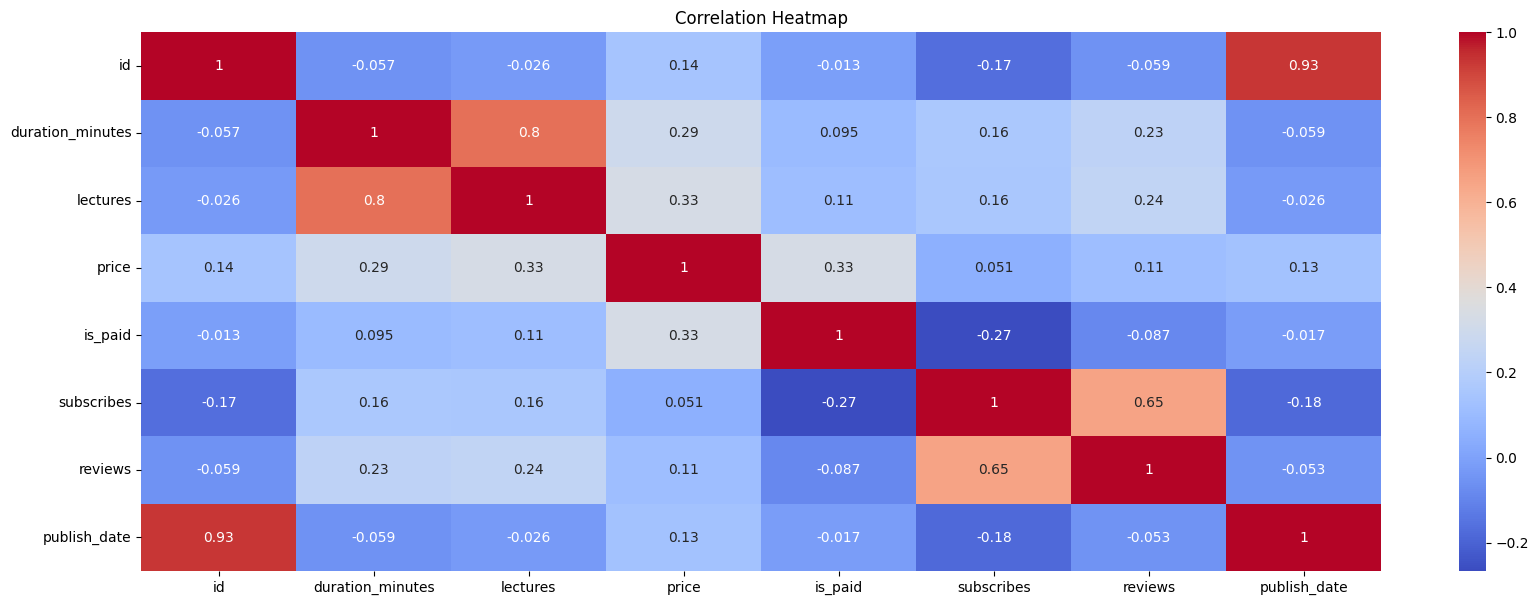

In [45]:
plt.figure(figsize = (20, 7))
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Stacked bar plot for subject/level


In [75]:
level_per_subj = df.groupby(['subject'])['level'].value_counts().to_frame()
level_per_subj

count
subject             level                    
Business Finance    All Levels            696
                    Beginner Level        340
                    Intermediate Level    128
                    Expert Level           31
Graphic Design      All Levels            298
                    Beginner Level        242
                    Intermediate Level     57
                    Expert Level            5
Musical Instruments Beginner Level        296
                    All Levels            276
                    Intermediate Level    101
                    Expert Level            7
Web Development     All Levels            658
                    Beginner Level        391
                    Intermediate Level    135
                    Expert Level           15

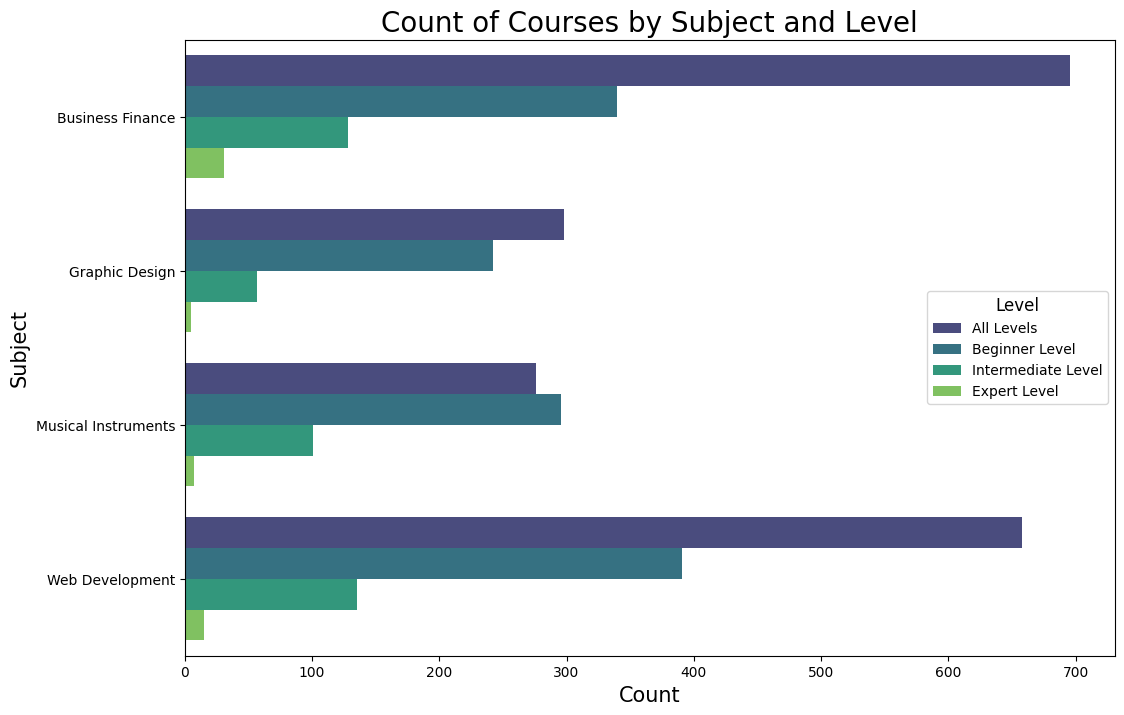

In [88]:
# Reset index to make 'subject' and 'level' as columns
df_reset = level_per_subj.reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='subject', hue='level', data=df_reset, palette='viridis')
plt.title('Count of Courses by Subject and Level', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Subject', fontsize=15)
plt.legend(title='Level', title_fontsize='12')
plt.show()

<Figure size 1800x1200 with 0 Axes>

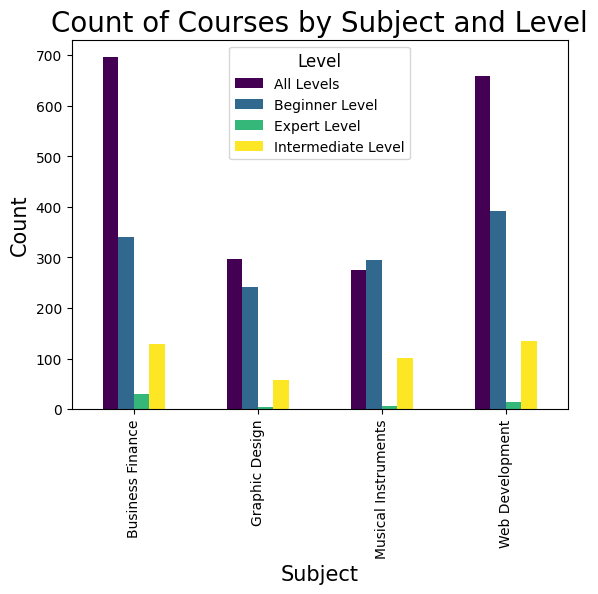

In [87]:
plt.figure(figsize=(18, 12))
df_reset.pivot_table(values='count', index='subject', columns='level', aggfunc='sum').plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Count of Courses by Subject and Level', fontsize=20)
plt.xlabel('Subject', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Level', title_fontsize='12')
plt.show()

### Courses per year

In [61]:
courses_per_year = df.groupby('publish_date')['publish_date'].agg({'count', 'mean'})
courses_per_year

,count,mean
publish_date,,
2011,5,2011.0
2012,45,2012.0
2013,201,2013.0
2014,490,2014.0
2015,1014,2015.0
2016,1204,2016.0
2017,717,2017.0


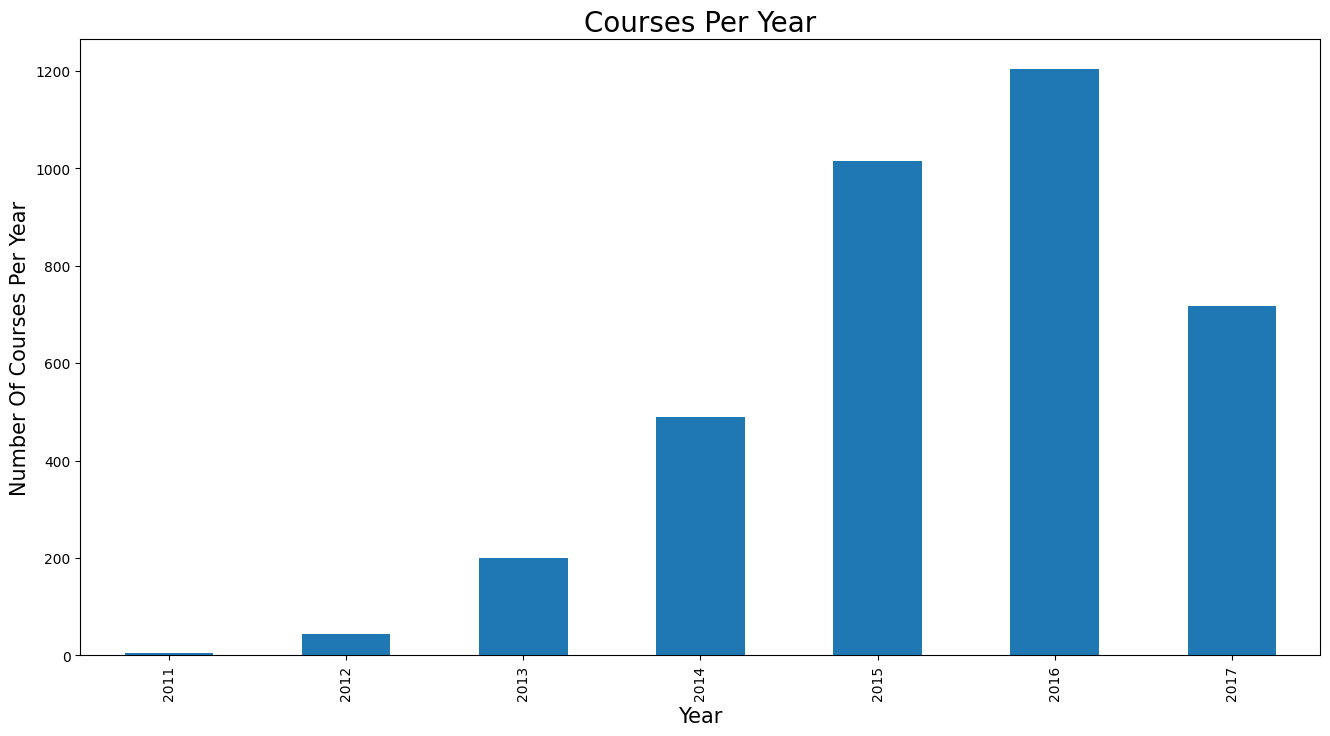

In [74]:
plt.figure(figsize = (16, 8))
courses_per_year['count'].plot(kind = 'bar')
plt.title("Courses Per Year", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Number Of Courses Per Year", fontsize = 15)
plt.show()

### Using boxplot to check outliers

<AxesSubplot:>

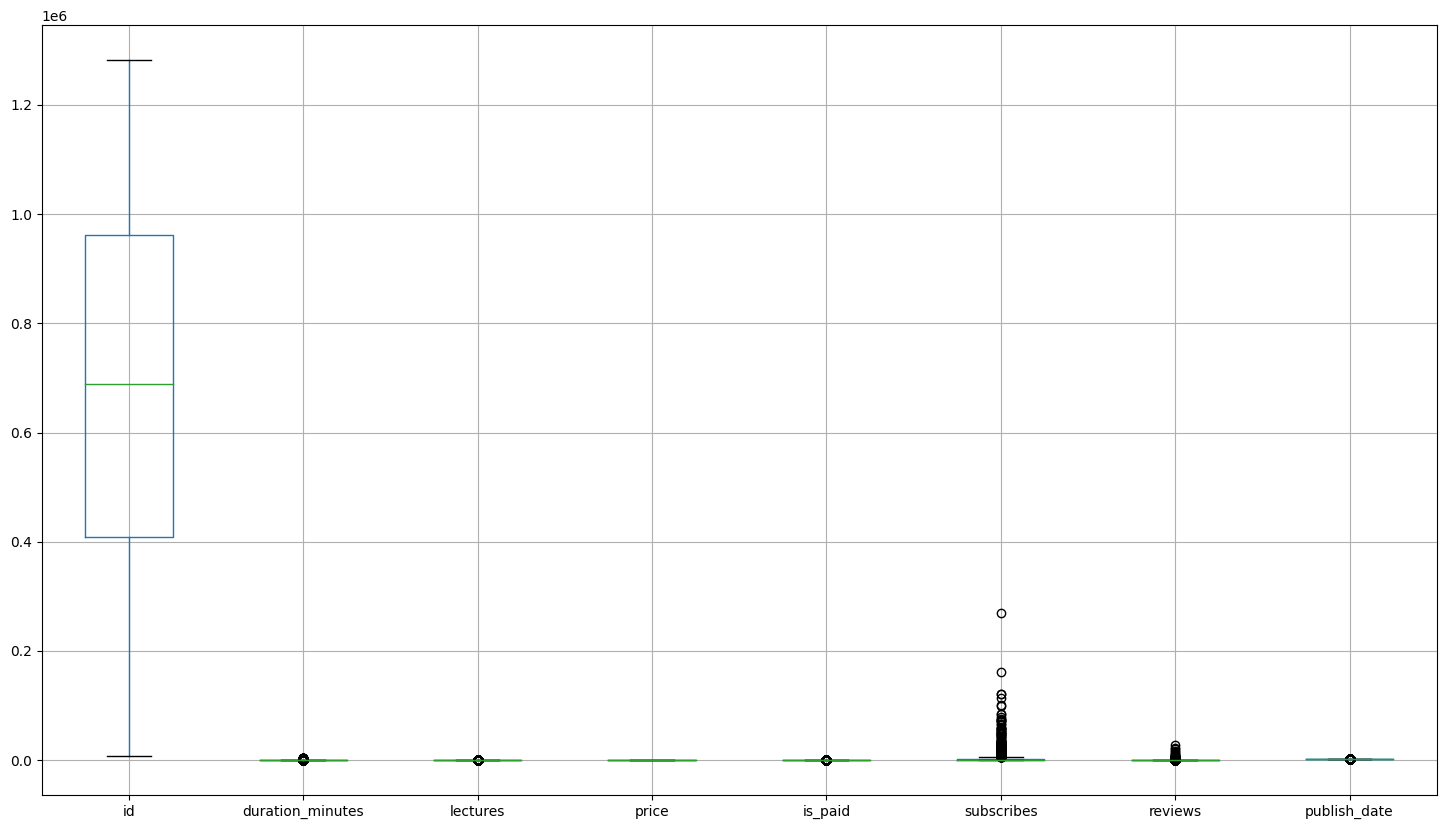

In [92]:
df.boxplot(figsize = (18, 10))

### Histogram chart of for each numeric feature of `df`

In [107]:
def hist_chart(cols):
    for col in cols:
        df[col].plot(kind='hist', bins=100, edgecolor='black', figsize=(12, 6))
        plt.title(f'Distribution of Course {col}')
        plt.xlabel(f'{col}')
        plt.ylabel('Frequency')
        plt.show()

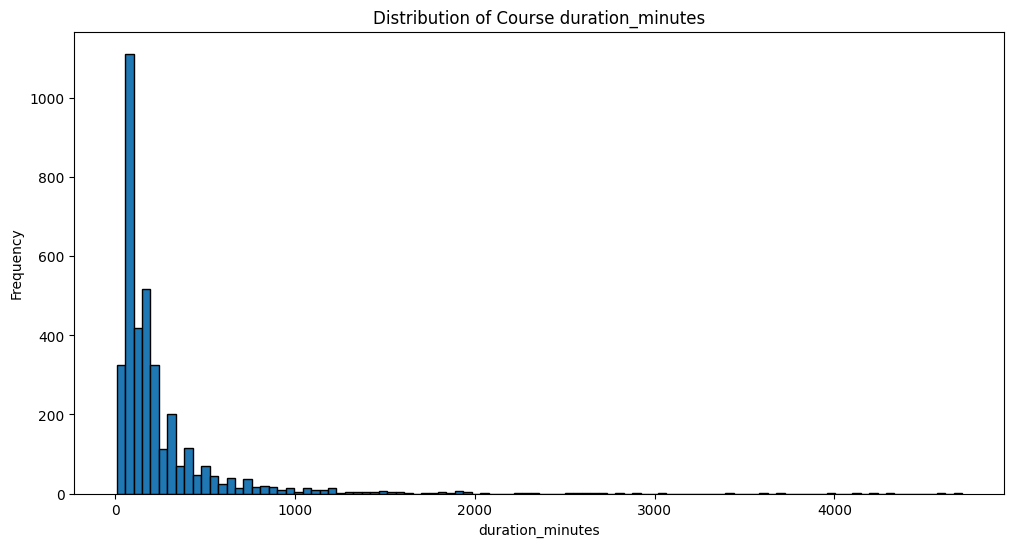

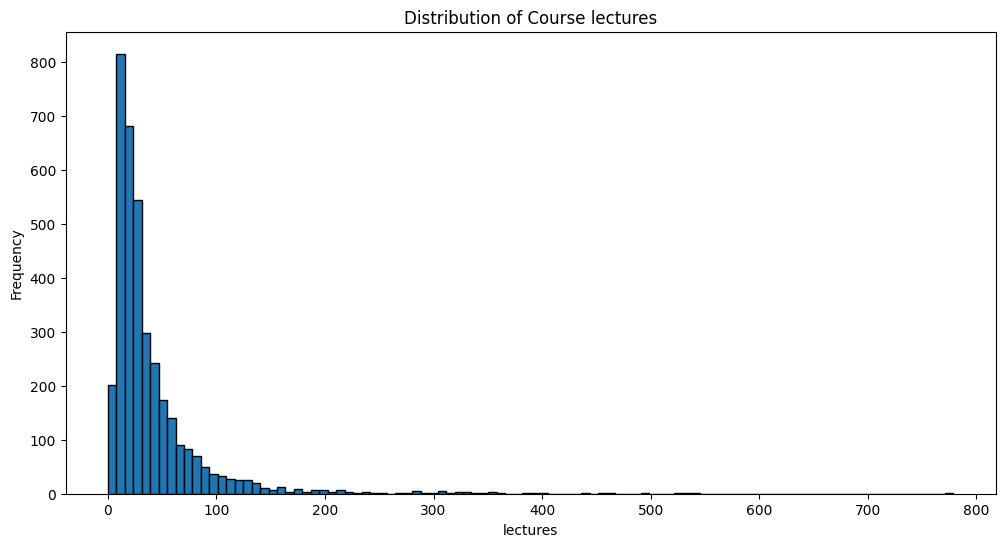

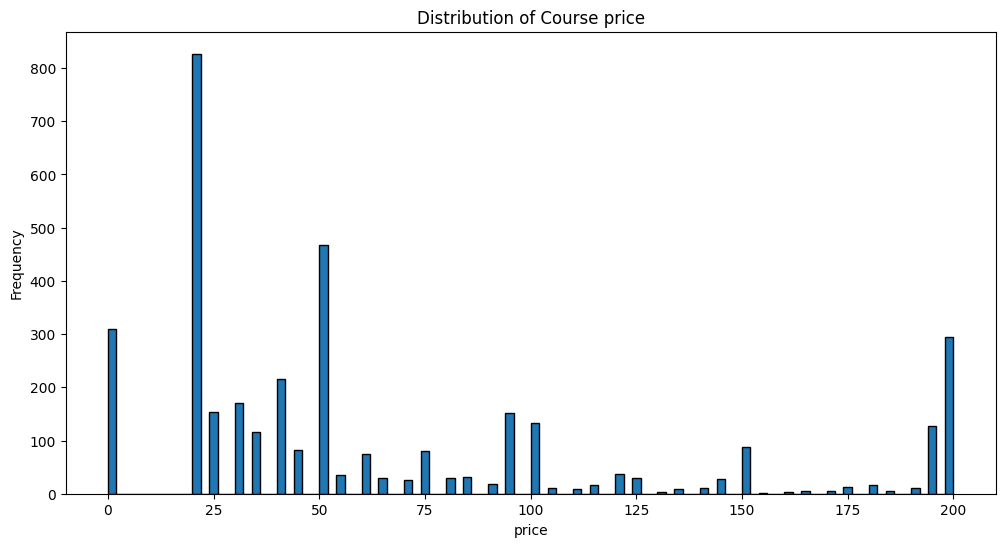

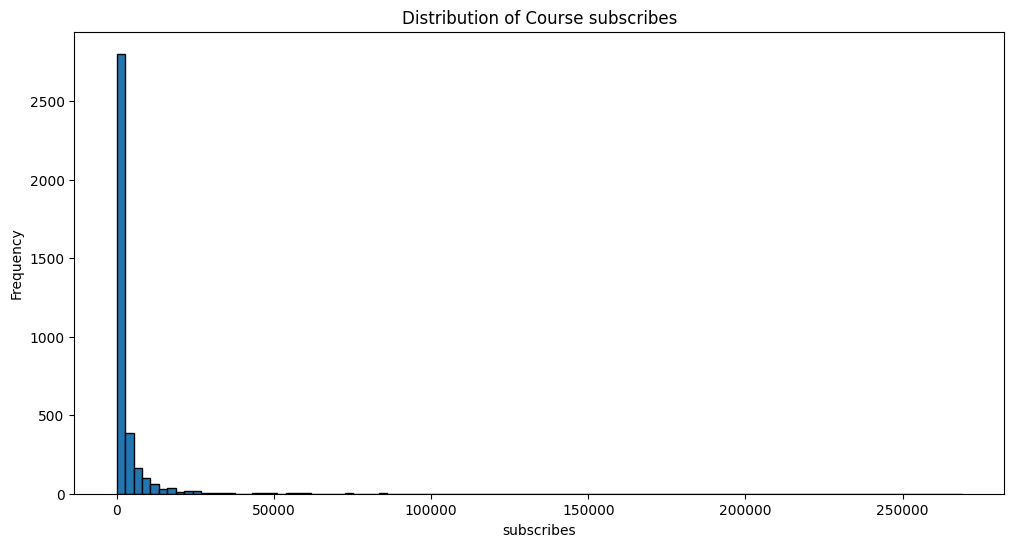

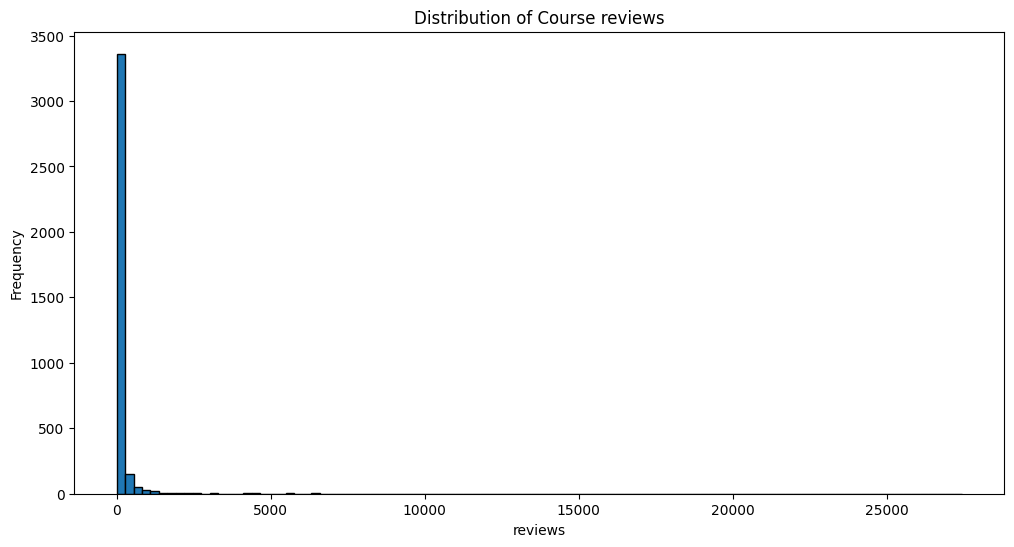

In [108]:
hist_chart(['duration_minutes', 'lectures', 'price', 'subscribes', 'reviews'])

### Distribution of `subject` column

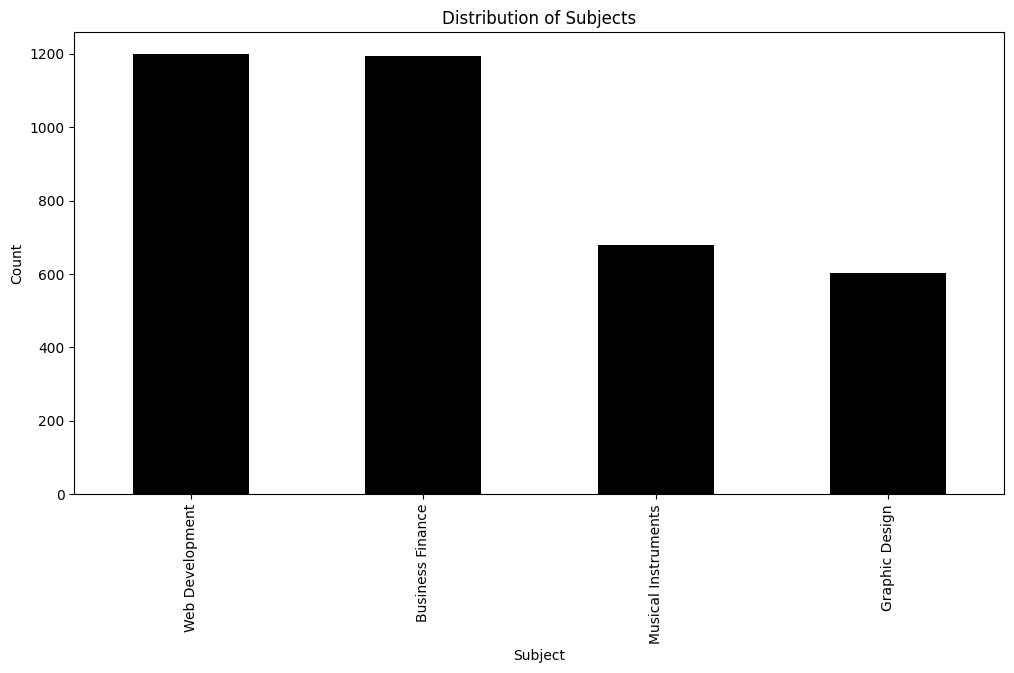

In [110]:
df['subject'].value_counts().plot(kind='bar', color='black', figsize=(12, 6))
plt.title('Distribution of Subjects')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.show()

### Pie chart of `is_paid` column

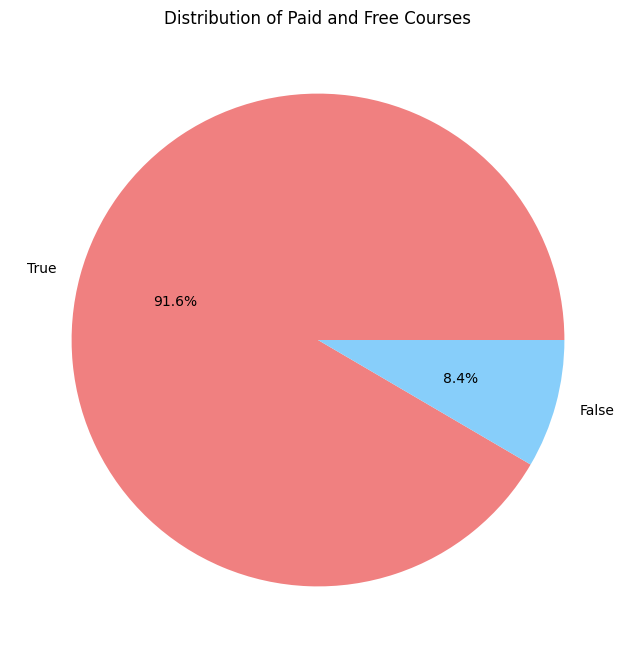

In [132]:
plt.figure(figsize = (12, 8))
df['is_paid'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Paid and Free Courses')
plt.ylabel('')
plt.show()

### Pairplot for numerical features

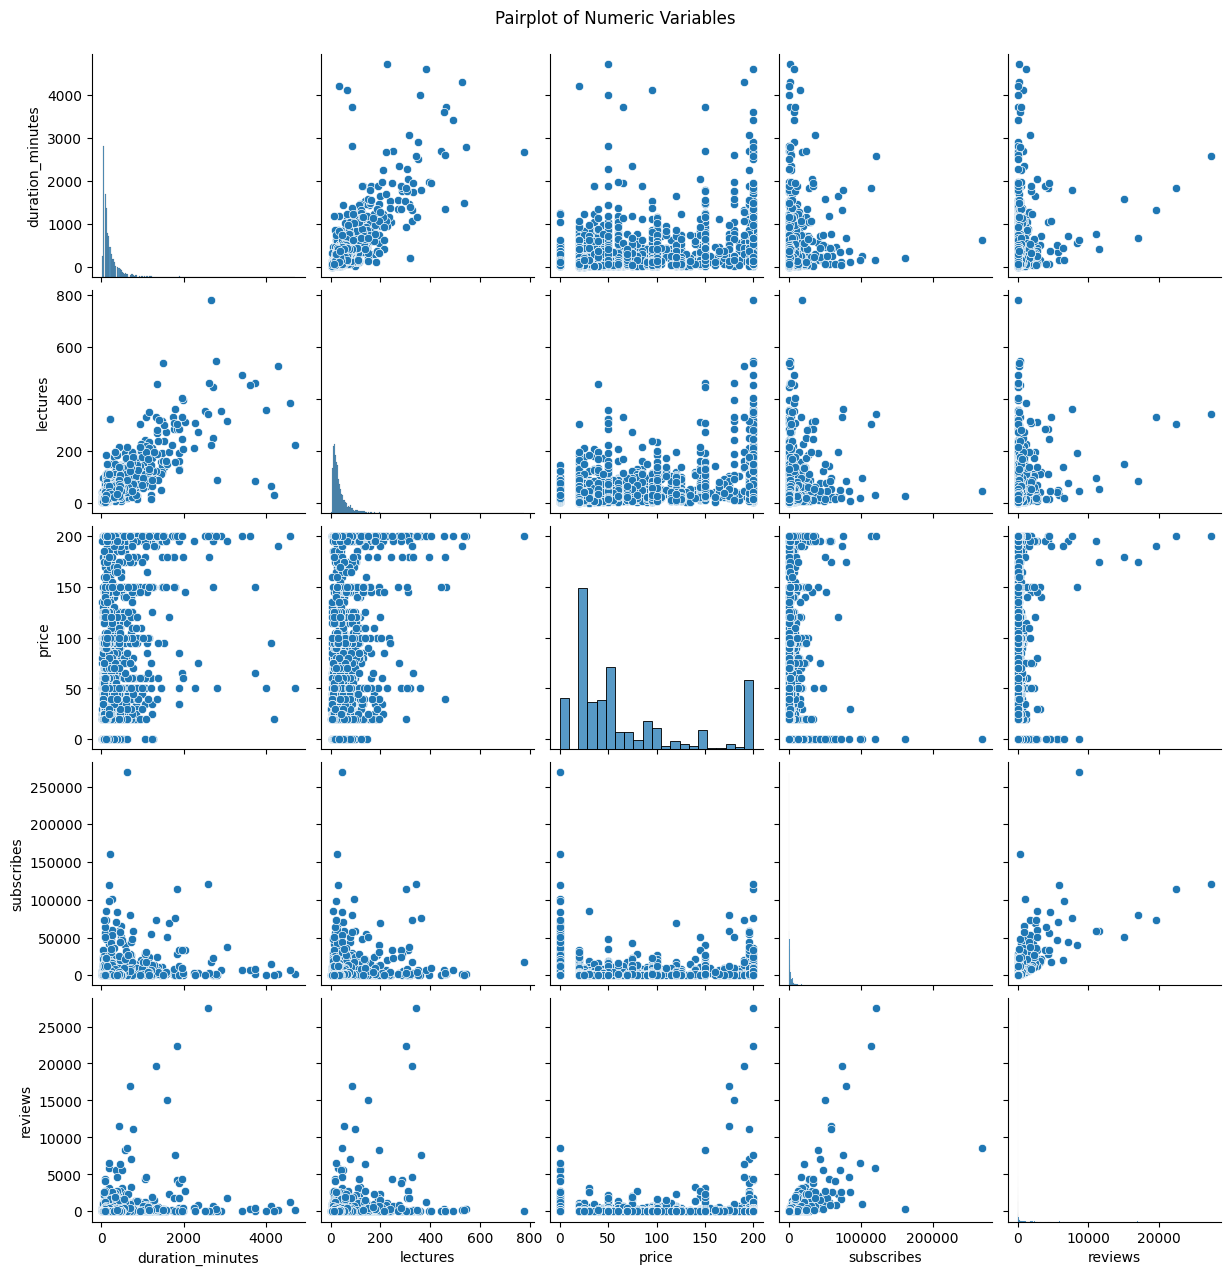

In [129]:
sns.pairplot(df[['duration_minutes', 'lectures', 'price', 'subscribes', 'reviews']])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()